In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:

# Load dataset
file_path = r"C:\Users\HP\OneDrive\Desktop\3rd sem project\project_final_dataset.xlsx"
df = pd.read_excel(file_path)

In [6]:
# Drop unnecessary columns
df = df.drop(columns=["WQI", "Unnamed: 11", "Unnamed: 12", "STATION CODE", "LOCATIONS", "STATE"])


In [7]:
# Fill missing values in Temp
df["Temp"].fillna(df["Temp"].median(), inplace=True)

# Define features and target (assuming contamination level is unknown and we predict a proxy target)
X = df.drop(columns=["year"])
y = np.random.rand(len(X))  # Placeholder target (since actual contamination levels are unknown)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\HP\AppData\Local\Temp\ipykernel_3440\62321700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Temp"].fillna(df["Temp"].median(), inplace=True)


In [8]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
nn = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)

# Train models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
nn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_nn = nn.predict(X_test_scaled)


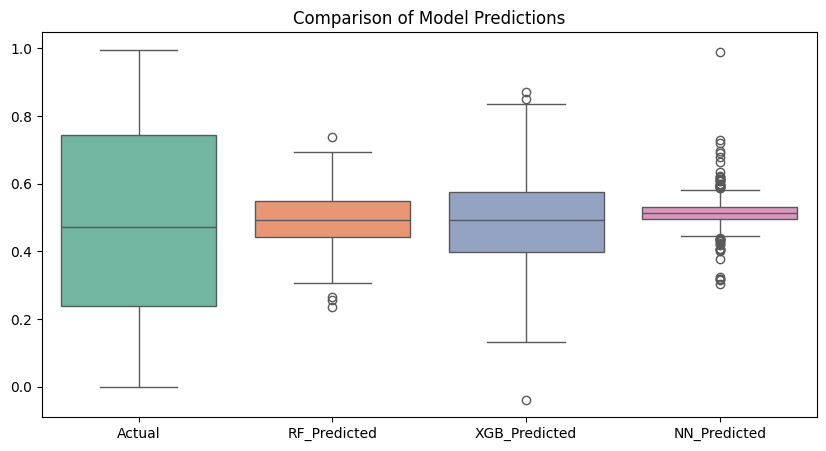

In [13]:
# Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(data=predictions_df, palette="Set2")
plt.title("Comparison of Model Predictions")
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{model_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

# Evaluate each model
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_nn, "Neural Network")


Random Forest - RMSE: 0.3049, R²: -0.0963, MAE: 0.2603
XGBoost - RMSE: 0.3301, R²: -0.2844, MAE: 0.2768
Neural Network - RMSE: 0.2906, R²: 0.0044, MAE: 0.2523


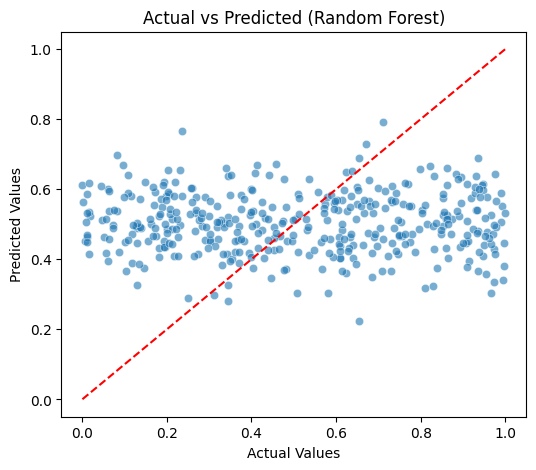

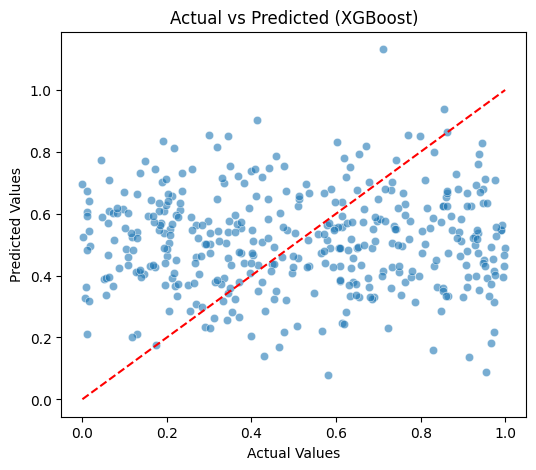

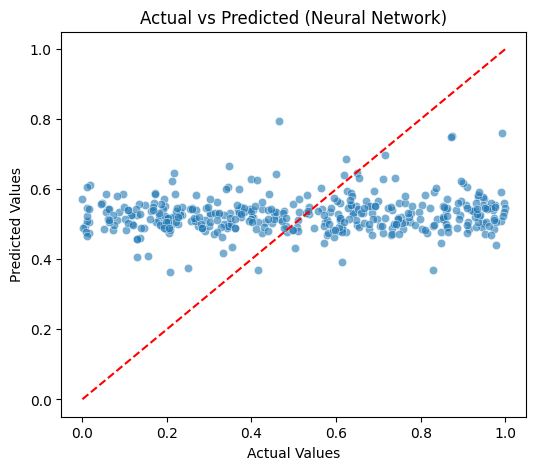

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot Actual vs Predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Perfect prediction line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.show()

# Plot for Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")

# Plot for XGBoost
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")

# Plot for Neural Network
plot_actual_vs_predicted(y_test, y_pred_nn, "Neural Network")
